# The perceptron algorithm

We will now code the perceptron algorithm from scratch from a simple problem. Given the position in space we have to predict the class of the datapoints.

Please complete the code in the where you find the "# complete here" commnet.

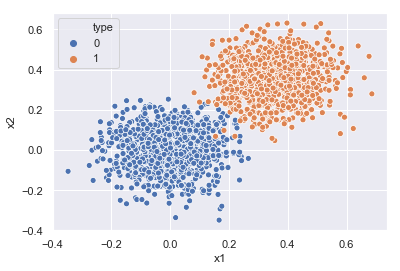

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

# initiating random number
np.random.seed(11)

#### Creating the dataset

# mean and standard deviation for the x belonging to the first class
mu_x1, sigma_x1 = 0, 0.1 

# constat to make the second distribution different from the first
x2_mu_diff = 0.35

# creating the first distribution
d1 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1 , 1000),
                   'x2': np.random.normal(mu_x1, sigma_x1 , 1000),
                   'type': 0})

# creating the second distribution
d2 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1 , 1000) + x2_mu_diff,
                   'x2': np.random.normal(mu_x1, sigma_x1 , 1000) + x2_mu_diff,
                   'type': 1})

data = pd.concat([d1, d2], ignore_index=True)


ax = sns.scatterplot(x="x1", y="x2", hue="type",
                      data=data)


In [2]:
class Perceptron(object):
    """
    Simple implementation of the perceptron algorithm
    """

    def __init__(self, w0=1, w1=0.1, w2=0.1):

        # weights
        self.w0 = w0  # bias
        self.w1 = w1
        self.w2 = w2

    def step_function(self, z):
        if z >= 0:
            return 1
        else:
            return 0

    def weighted_sum_inputs(self, x1, x2):
        return # complete here

    def predict(self, x1, x2):
        """
        Uses the step function to determine the output
        """
        z =  # complete here

        return self.step_function(z)

    def predict_boundary(self, x):
        """
        Used to predict the boundaries of our classifier
        """
        return -(self.w1 * x + self.w0) / self.w2

    def fit(self, X, y, epochs=1, step=0.1, verbose=True):
        """
        Train the model given the dataset
        """
        errors = []

        for epoch in range(epochs):
            error = 0
            for i in range(0, len(X.index)):
                x1, x2, target = X.values[i][0], X.values[i][1], y.values[i]
                # The update is proportional to the step size and the error
                update = step * (target - self.predict(x1, x2))
                self.w1 += # complete here
                self.w2 += # complete here
                self.w0 += # complete here
                error += int(update != 0.0)
            errors.append(error)
            if verbose:
                print('Epochs: {} - Error: {} - Errors from all epochs: {}'\
                      .format(epoch, error, errors))


SyntaxError: invalid syntax (<ipython-input-2-c64f1960cd82>, line 26)

In [ ]:
# Splitting the dataset in training and test set
msk = np.random.rand(len(data)) < 0.8

# Roughly 80% of data will go in the training set
train_x, train_y = data[['x1','x2']][msk], data.type[msk]
# Everything else will go into the validation set
test_x, test_y = data[['x1','x2']][~msk], data.type[~msk]


In [ ]:
my_perceptron = Perceptron(0.1,0.1)

my_perceptron.fit(train_x, train_y, epochs=1, step=0.005)

pred_y = test_x.apply(lambda x: my_perceptron.predict(x.x1, x.x2), axis=1)

cm = confusion_matrix(test_y, pred_y, labels=[0, 1])

print(pd.DataFrame(cm,
                   index=['True 0', 'True 1'], 
                   columns=['Predicted 0', 'Predicted 1']))

In [ ]:
my_perceptron.w0, my_perceptron.w1, my_perceptron.w2

In [ ]:
# Adds decision boundary line to the scatterplot

ax = sns.scatterplot(x="x1", y="x2", hue="type",
                      data=data[~msk])
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = my_perceptron.predict_boundary(x_vals)
ax.plot(x_vals, y_vals, '--', c="red")